In [1]:
import pandas as pd
df = pd.read_csv('../data/Admission_Predict.csv')

print(df.columns)

df.drop(columns = 'Serial No.', inplace = True)
df.rename(columns = {'LOR ' : 'LOR', 'Chance of Admit ': 'Chance of Admit'}, inplace = True)
print(df.size)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')
3200


In [2]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
# target variable - Chance of Admit
print(df['Chance of Admit'])

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit, Length: 400, dtype: float64


count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit, dtype: float64


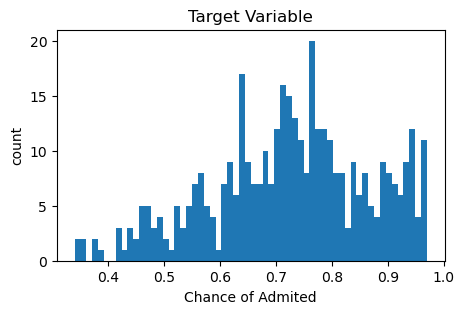

In [4]:
import matplotlib
from matplotlib import pylab as plt

print(df['Chance of Admit'].describe())
plt.figure(figsize=(5,3))

df['Chance of Admit'].plot.hist(bins = df['Chance of Admit'].nunique())
plt.title('Target Variable')
plt.xlabel('Chance of Admited')
plt.ylabel('count')
plt.savefig('Target Variable', dpi= 300, bbox_inches = 'tight')
plt.show()

In [5]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
# catagorical features
print(df['University Rating'].value_counts())
print(df['SOP'].value_counts())
print(df['LOR'].value_counts())

# Ordinary features
print(df['Research'].value_counts())

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64
4.0    70
3.5    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64
3.0    85
4.0    77
3.5    73
4.5    45
2.5    39
2.0    38
5.0    35
1.5     7
1.0     1
Name: LOR, dtype: int64
1    219
0    181
Name: Research, dtype: int64


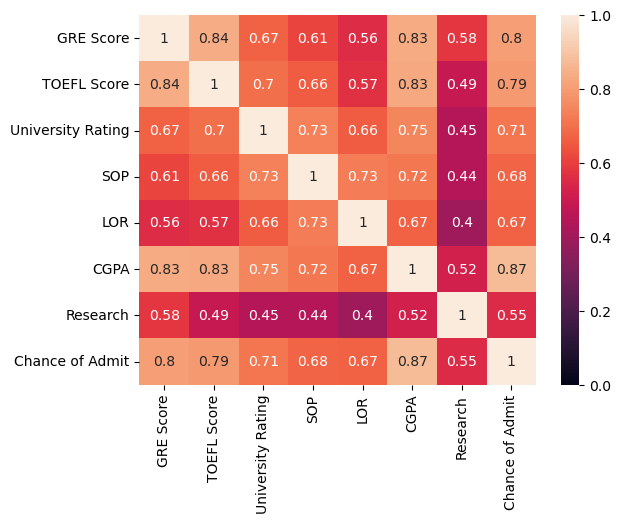

In [7]:
import seaborn as sns
sns.heatmap(df.corr(), vmin=0, vmax=1, annot = True)
plt.plot('Heat map of features with target variables')
plt.savefig('Heat map', dpi= 300,bbox_inches = 'tight')

<Figure size 500x300 with 0 Axes>

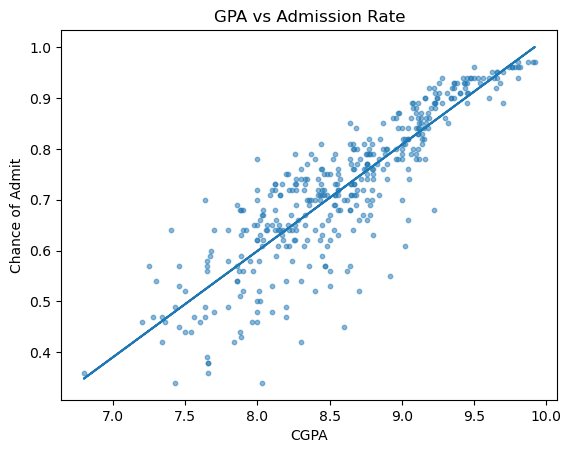

In [8]:
import numpy as np 

plt.figure(figsize=(5,3))
df.plot.scatter('CGPA','Chance of Admit',s=10,alpha=0.5) 
m, b = np.polyfit(df['CGPA'],df['Chance of Admit'] ,1)
plt.plot(df['CGPA'], m*df['CGPA']+b)
plt.title('GPA vs Admission Rate')
plt.savefig('GPA vs Admission Rate', dpi= 300)
plt.show()

<Figure size 500x300 with 0 Axes>

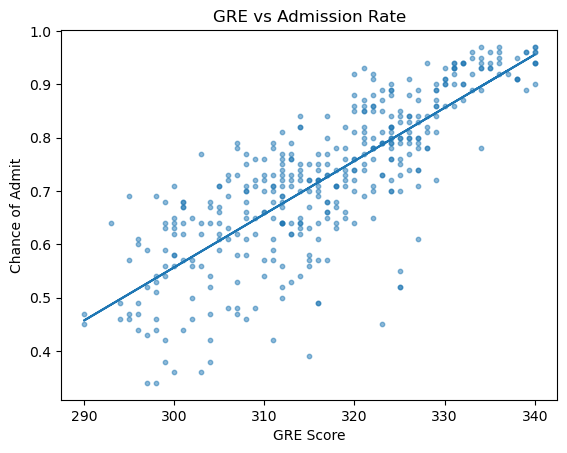

In [9]:
plt.figure(figsize=(5,3))
df.plot.scatter('GRE Score','Chance of Admit',s=10,alpha=0.5) 
m, b = np.polyfit(df['GRE Score'],df['Chance of Admit'] ,1)
plt.plot(df['GRE Score'], m*df['GRE Score']+b)
plt.title('GRE vs Admission Rate')
plt.savefig('GRE vs Admission Rate', dpi= 300)
plt.show()

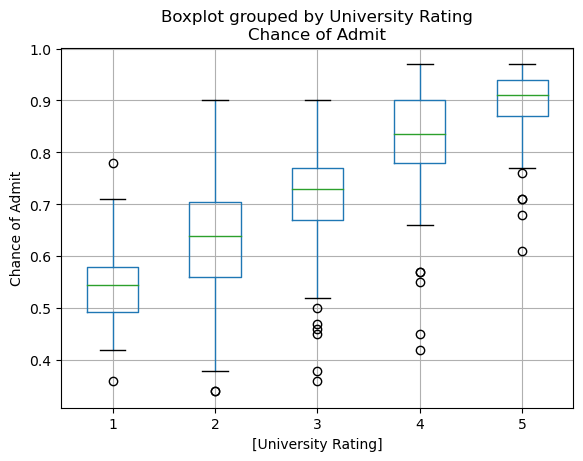

In [10]:
df[['Chance of Admit','University Rating']].boxplot(by='University Rating')
plt.ylabel('Chance of Admit')
plt.savefig('University Rating', dpi= 300)
plt.show()

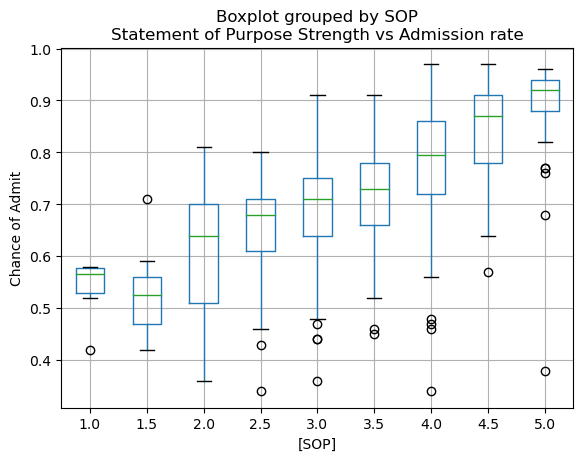

In [58]:
df[['Chance of Admit','SOP']].boxplot(by='SOP')
plt.ylabel('Chance of Admit')
plt.title('Statement of Purpose Strength vs Admission rate')
plt.savefig('Statement of Purpose Strength', dpi= 300)
plt.show()

In [12]:
print(df['SOP'].value_counts())

4.0    70
3.5    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64


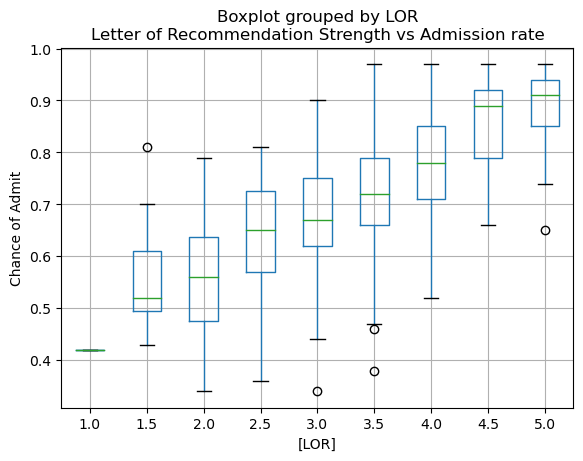

In [57]:
df[['Chance of Admit','LOR']].boxplot(by='LOR')
plt.ylabel('Chance of Admit')
plt.title('Letter of Recommendation Strength vs Admission rate')
plt.savefig('Letter of Recommendation Strength', dpi= 300)
plt.show()

In [14]:
print(df['LOR'].value_counts())

3.0    85
4.0    77
3.5    73
4.5    45
2.5    39
2.0    38
5.0    35
1.5     7
1.0     1
Name: LOR, dtype: int64


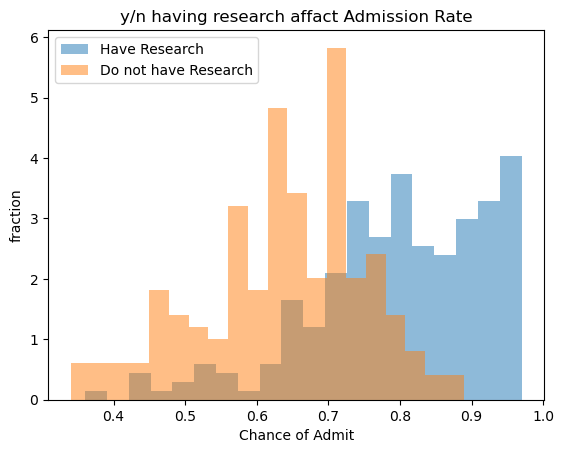

In [15]:
categories = df['Research'].unique()

for c in categories:
    if (c == 0):
        label_graph = 'Do not have Research'
    else:
        label_graph = 'Have Research'
    plt.hist(df[df['Research']==c]['Chance of Admit'],alpha=0.5,label = label_graph,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Chance of Admit')
plt.title('y/n having research affact Admission Rate')
plt.savefig('yn having research ', dpi= 300)
plt.show()

In [16]:
perc_missing_value = df.isnull().sum(axis=0)/df.shape[0] 
print('percentage of missing value:', perc_missing_value)

percentage of missing value: GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64


In [17]:
from sklearn.model_selection import train_test_split

def basic_split(X,y,train_size,val_size,test_size,random_state):
    # test the inputs
    if ((train_size + val_size + test_size) == 1) & isinstance(random_state,int) == True:
        print ('input is correct') 
    else:
        print ('input is wrong')
    # perform basic split
    X_train, X_other, y_train, y_other = train_test_split(X,y, train_size = train_size, \
                                                    stratify = X['University Rating'], random_state = random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size= val_size/(1-train_size),\
                                                    stratify = X_other['University Rating'], random_state = random_state)

    return X_train, y_train, X_val, y_val, X_test, y_test

y = df['Chance of Admit']
X = df.loc[:, df.columns != 'Chance of Admit']
random_state = 42

#X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X,y,0.6,0.2,0.2,random_state)
#print(X_train)

In [18]:
#print(df['University Rating'].value_counts())

In [19]:
#from sklearn.model_selection import train_test_split
#def basic_split(X,y,train_size,val_size,test_size,random_state):
    #test the inputs
    #if ((train_size + val_size + test_size) == 1) & isinstance(random_state,int) == True:
        #print ('input is correct') 
    #else:
        #print ('input is wrong')
    # perform basic split
    #X_train, X_other, y_train, y_other = train_test_split(X,y, train_size = train_size, \
                                                    #stratify = X['University Rating'], random_state = random_state)
    #X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size= val_size/(1-train_size),\
                                                    #stratify = X_other['University Rating'], random_state = random_state)
    # test the outputs
    #print ('If we use stratification:')
    #print(np.unique(X_train['University Rating'],return_counts=True))
    #print(np.unique(X_val['University Rating'],return_counts=True))
    #print(np.unique(X_test['University Rating'],return_counts=True))
    
    #return X_train, y_train, X_val, y_val, X_test, y_test

#y = df['Chance of Admit']
#X = df.loc[:, df.columns != 'Chance of Admit']
#random_state = 42
#X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X,y,0.6,0.2,0.2,random_state)


In [20]:
#from sklearn.feature_selection import f_regression, SelectKBest

#target = y_train
#features = X_train.columns

# linear correlation [f regression]
#f_values, p_values = f_regression(X_train, y_train) 
#temp_df = pd.DataFrame.from_dict({
    #'feature': features,
    #'f_values': f_values
#})
#sorted_df = temp_df.sort_values(by='f_values', ascending=False).iloc[:5, :] 
#top5 = sorted_df['feature'][:5] 
#print(top5)
#plt.figure(figsize=(15, 10))
#sorted_df.plot.bar(x='feature', y='f_values')
#plt.show()

In [21]:
#print(X_train.head())

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import ParameterGrid
import xgboost
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.simplefilter(action='ignore')

/Users/seanxu/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [23]:
# modeling
# Linear regression

#LinReg = LinearRegression(fit_intercept=True)
#LinReg.fit(X_train,y_train)
#print('intercept:',LinReg.intercept_)
#print('w:',LinReg.coef_)

#train_RMSE = np.sqrt(mean_squared_error(y_train,LinReg.predict(X_train)))
#val_RMSE = np.sqrt(mean_squared_error(y_val,LinReg.predict(X_val)))
#print('train RMSE:',train_RMSE)
#print('val RMSE:',val_RMSE)


#x_model = np.linspace(0,1,100)
#plt.figure(figsize=(6.4,3.6))
#plt.scatter(X_train.iloc[:,0],y_train,color='k',label='training set')
#plt.scatter(X_val.iloc[:,0],y_val,color='r',label='val set')
#plt.ylim([-1,1])
#plt.xlabel('feature')
#plt.ylabel('target variable')
#plt.legend()
#plt.show()

In [37]:
T_base_score = []

RMSE_Lin = []

RMSE_Las = []

RMSE_Rid = []

RMSE_KNR = []

RMSE_XGB = []

RMSE_RF = []

for i in range(1,6):
    X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X,y,0.6,0.2,0.2,random_state*i)
    
    #print(X_test)
    
    ORD_FEAT = ['University Rating', 'SOP', 'LOR']
    CAT_FEAT = ['Research']
    NUM_FEAT = ['GRE Score','TOEFL Score', 'CGPA']
    
    
    
    
    enc_hot = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])
    enc_minmax = Pipeline(steps=[('scaler', MinMaxScaler())])
    enc_ord = Pipeline(steps = [('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])
    
    preprocessor = ColumnTransformer(transformers=[('NUM', enc_minmax, NUM_FEAT), ('CAT', enc_hot, CAT_FEAT), ('ORD', enc_ord, ORD_FEAT)])
    df_train_prep = preprocessor.fit_transform(X_train)
    df_val_prep = preprocessor.transform(X_val)
    df_test_prep = preprocessor.transform(X_test)
    
    # collect feature names
    feature_names = preprocessor.get_feature_names_out()
    X_train_prep = pd.DataFrame(data=df_train_prep,columns=feature_names)
    X_val_prep = pd.DataFrame(data=df_val_prep,columns=feature_names)
    X_test_prep = pd.DataFrame(data=df_test_prep,columns=feature_names)
    
    #print(df_test_prep)
    
    print('Random State:', '[', i*42, ']')
    
    #baseline
    y_pred = np.full(len(y_test), np.mean(y_test)) 
    y_true = y_test
    base_score = np.sqrt(mean_squared_error(y_true, y_pred))
    print('baseline RMSE: ', base_score)
    T_base_score.append(base_score)
    
    #Linear Regression
    lin_reg = LinearRegression(fit_intercept=True)
    lin_reg.fit(X_train_prep,y_train)
    min_lin = np.sqrt(mean_squared_error(y_test,lin_reg.predict(X_test_prep)))
    
    print('For Linear Regression:')
    print('RMSE: ', min_lin)          
    RMSE_Lin.append(min_lin)

    #Lasso Regression
    min_las = 10
    final_alpha = 0
    
    alpha = np.logspace(-3,3,10)
    for a in range(len(alpha)):
        las_reg = Lasso(alpha=alpha[a],max_iter=100000)
        las_reg.fit(X_train_prep, y_train)
        y_pred = las_reg.predict(X_test_prep)
        
        if (np.sqrt(mean_squared_error(y_test,y_pred))) < min_las:
            min_las = np.sqrt(mean_squared_error(y_test,y_pred))
            final_alpha = alpha[a]

    print('For Lasso Regression:')
    print('Alpha: ', final_alpha)
    print('Best RMSE: ', min_las)
    RMSE_Las.append(min_las)
        
    #Ridge regularization
    min_rid = 10
    final_alpha_rid = 0
               
    for b in range(len(alpha)):
        rid_reg = Ridge(alpha=alpha[b])
        rid_reg.fit(X_train_prep, y_train)
        y_pred = rid_reg.predict(X_test_prep)
                      
        if (np.sqrt(mean_squared_error(y_test,y_pred))) < min_rid:
            min_rid = np.sqrt(mean_squared_error(y_test,y_pred))
            final_alpha_rid = alpha[b]
    
    print('For Ridge Regression:')
    print('Alpha: ', final_alpha)
    print('Best RMSE: ', min_rid)
    RMSE_Rid.append(min_rid)
        
    #KNR
    min_KNR = 10
    final_neighbors = 0                  
                      
    n_neighbors = [1, 3, 10, 30]
    for c in (n_neighbors):
        KNR_reg = KNeighborsRegressor(n_neighbors=c) 
        KNR_reg.fit(X_train_prep, y_train)
        y_pred = KNR_reg.predict(X_test_prep)

        if (np.sqrt(mean_squared_error(y_test,y_pred))) < min_KNR:
            min_KNR = np.sqrt(mean_squared_error(y_test,y_pred))
            final_neighbors = c
                      
    print('For KNR:')
    print('n_neighbors: ', final_neighbors)
    print('Best RMSE: ', min_KNR)
    RMSE_KNR.append(min_KNR)
    
    #XGB boost
    min_KNR = 10
    final_depth = 0
    
    param_grid = {'max_depth': [1, 3, 10, 20, 30]}
    
    for d in range(len(param_grid['max_depth'])):
        params = ParameterGrid(param_grid)[d] 
        XGB = xgboost.XGBClassifier(max_depth = params['max_depth'],eval_metric='mlogloss')
        XGB.fit(X_train_prep,y_train, verbose = False)
        y_pred = XGB.predict(X_test_prep)
        
        if (np.sqrt(mean_squared_error(y_test,y_pred))) < min_KNR:
            min_XGB = np.sqrt(mean_squared_error(y_test,y_pred))
            final_depth = ParameterGrid(param_grid)[d]
            
    print('For XGB:')
    print('max_depth: ', final_depth)
    print('Best RMSE: ', min_XGB)
    RMSE_XGB.append(min_XGB)
    
    #random forest
    min_RF = 30
    split = 5
    
    RF_reg = RandomForestRegressor(min_samples_split = split)
    RF_reg.fit(X_train_prep,y_train)
    
    min_RF = np.sqrt(mean_squared_error(y_test,RF_reg.predict(X_test_prep)))
    
    print('For Random Forest Regression:')
    print('RMSE: ', min_RF)          
    RMSE_RF.append(min_RF)
    
    

input is correct
Random State: [ 42 ]
baseline RMSE:  0.14164303724504074
For Linear Regression:
RMSE:  0.07775972040473246
For Lasso Regression:
Alpha:  0.001
Best RMSE:  0.078251768287093
For Ridge Regression:
Alpha:  0.001
Best RMSE:  0.07776135627624649
For KNR:
n_neighbors:  10
Best RMSE:  0.09711674675358517
For XGB:
max_depth:  {'max_depth': 30}
Best RMSE:  0.09618341852939101
For Random Forest Regression:
RMSE:  0.07998681458204829
input is correct
Random State: [ 84 ]
baseline RMSE:  0.14023501479659065
For Linear Regression:
RMSE:  0.06205427126081789
For Lasso Regression:
Alpha:  0.001
Best RMSE:  0.061624323406804044
For Ridge Regression:
Alpha:  0.001
Best RMSE:  0.06205501669080024
For KNR:
n_neighbors:  10
Best RMSE:  0.08022258098565514
For XGB:
max_depth:  {'max_depth': 30}
Best RMSE:  0.08243178998420451
For Random Forest Regression:
RMSE:  0.07047135301098065
input is correct
Random State: [ 126 ]
baseline RMSE:  0.14745926344248433
For Linear Regression:
RMSE:  0.07

In [38]:
X_test_prep

,NUM__GRE Score,NUM__TOEFL Score,NUM__CGPA,CAT__Research_0,CAT__Research_1,ORD__University Rating,ORD__SOP,ORD__LOR
0,0.88,0.846154,0.896825,0.0,1.0,3.0,6.0,5.0
1,0.08,0.038462,0.142857,1.0,0.0,0.0,1.0,1.0
2,0.82,0.846154,0.785714,0.0,1.0,4.0,6.0,6.0
3,0.40,0.461538,0.428571,1.0,0.0,3.0,1.0,3.0
4,0.44,0.500000,0.468254,0.0,1.0,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...
75,0.68,0.500000,0.630952,0.0,1.0,3.0,6.0,7.0
76,0.68,0.615385,0.698413,0.0,1.0,2.0,5.0,5.0
77,0.52,0.384615,0.285714,0.0,1.0,2.0,4.0,5.0
78,0.62,0.653846,0.670635,0.0,1.0,3.0,6.0,6.0


In [39]:
model = []

M_base_score = np.mean(T_base_score)
M_RMSE_Lin = np.mean(RMSE_Lin)
M_RMSE_Las = np.mean(RMSE_Las)
M_RMSE_Rid = np.mean(RMSE_Rid)
M_RMSE_KNR = np.mean(RMSE_KNR)
M_RMSE_XGB = np.mean(RMSE_XGB)
M_RMSE_RF = np.mean(RMSE_RF)

S_base_score = np.std(T_base_score)
S_RMSE_Lin = np.std(RMSE_Lin)
S_RMSE_Las = np.std(RMSE_Las)
S_RMSE_Rid = np.std(RMSE_Rid)
S_RMSE_KNR = np.std(RMSE_KNR)
S_RMSE_XGB = np.std(RMSE_XGB)
S_RMSE_RF = np.std(RMSE_RF)

model.append(['Baseline score', M_base_score, S_base_score])
model.append(['Linear Regression', M_RMSE_Lin, S_RMSE_Lin])
model.append(['Lasso Regression', M_RMSE_Las, S_RMSE_Las])
model.append(['Ridge Regression', M_RMSE_Rid, S_RMSE_Rid])
model.append(['KNeighbor Regression', M_RMSE_KNR, S_RMSE_KNR])
model.append(['XG Boost', M_RMSE_XGB, S_RMSE_XGB])
model.append(['Random Forest', M_RMSE_RF, S_RMSE_RF])

T_model = pd.DataFrame(model, columns = ['Model', 'RMSE Score', 'Standard Deviation'])
Sort_model = T_model.sort_values(by = ['RMSE Score'])
print(Sort_model)

                  Model  RMSE Score  Standard Deviation
3      Ridge Regression    0.068007            0.006932
2      Lasso Regression    0.068283            0.007289
1     Linear Regression    0.068397            0.006704
6         Random Forest    0.072977            0.004561
4  KNeighbor Regression    0.084676            0.008501
5              XG Boost    0.085617            0.008229
0        Baseline score    0.139160            0.005506


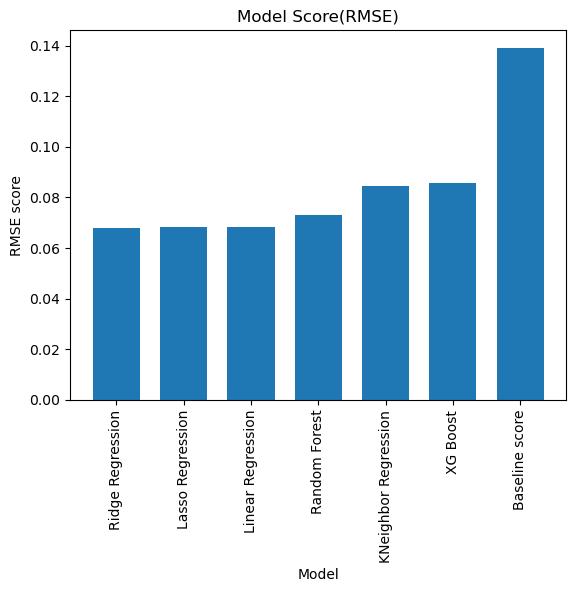

In [40]:
plt.bar(Sort_model['Model'], Sort_model['RMSE Score'], width=0.7, label = str)
plt.xticks(rotation=90)
plt.title('Model Score(RMSE)')
plt.xlabel('Model')
plt.ylabel('RMSE score')
plt.savefig('model_score', dpi= 300, bbox_inches = 'tight')
plt.show()

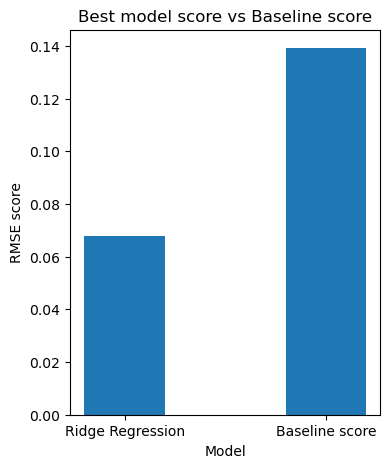

In [41]:
plt.figure(figsize = (4,5))
plt.bar((Sort_model['Model'].iloc[0], Sort_model['Model'].iloc[6]), 
        (Sort_model['RMSE Score'].iloc[0], Sort_model['RMSE Score'].iloc[6]), width=0.4, label = str)
plt.xlabel('Model')
plt.ylabel('RMSE score')
plt.title('Best model score vs Baseline score')
plt.savefig('Best model vs baseline', dpi= 300, bbox_inches = 'tight')
plt.show()

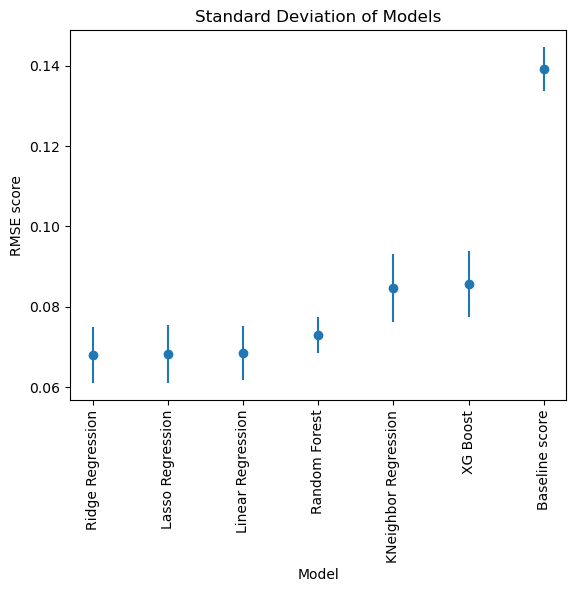

In [42]:
plt.errorbar(Sort_model['Model'], Sort_model['RMSE Score'], yerr = Sort_model['Standard Deviation'], fmt = 'o')
plt.xticks(rotation=90)
plt.title('Standard Deviation of Models')
plt.xlabel('Model')
plt.ylabel('RMSE score')
plt.savefig('std of model', dpi= 300, bbox_inches = 'tight')
plt.show()

In [43]:
rid_reg = Ridge(alpha=0.001)
rid_reg.fit(X_train_prep, y_train)
y_pred = rid_reg.predict(X_test_prep)

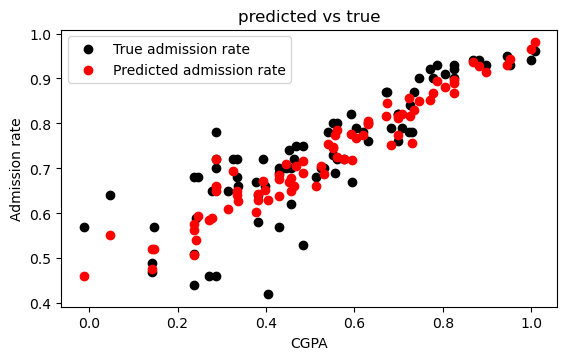

In [48]:
plt.figure(figsize=(6.4,3.6))
plt.scatter(X_test_prep.iloc[:,2],y_test,color='k',label='True admission rate')
plt.scatter(X_test_prep.iloc[:,2],y_pred,color='r',label='Predicted admission rate')

plt.xlabel('CGPA')
plt.ylabel('Admission rate')
plt.title('predicted vs true')
plt.legend()
plt.savefig('predicted vs true CGPA with Admission rate', dpi= 300)
plt.show()

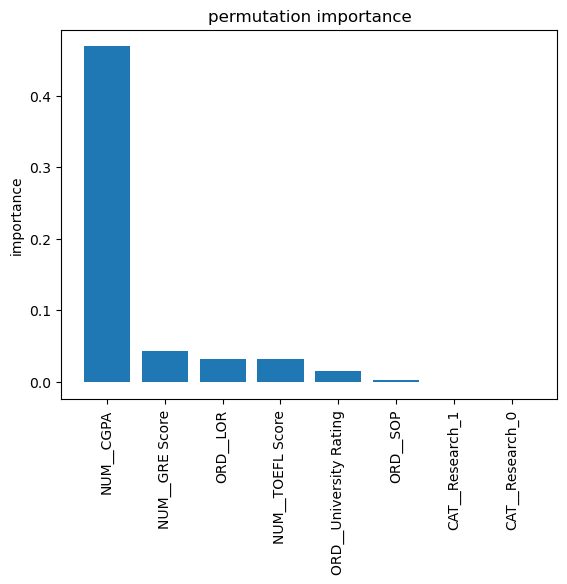

In [49]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rid_reg, X_test_prep, y_test, n_repeats=10,random_state=0)
feature_importance = {}
for feature,importance in zip(list(X_test_prep.columns),list(result.importances_mean)):
    feature_importance[feature] = importance
res1 = sorted(feature_importance.items(),key=lambda x:x[1],reverse=True)

plt.bar(list(dict(res1).keys())[0:10],list(dict(res1).values())[0:10]) 
plt.xticks(rotation=90)
plt.title('permutation importance')
plt.ylabel('importance')
plt.savefig('permutation importance', dpi= 300, bbox_inches = 'tight')
plt.show()

In [50]:
import shap

rid_reg = Ridge(alpha=0.001)
rid_reg.fit(X_train_prep, y_train)

explainer = shap.explainers.Linear(rid_reg, X_test_prep)
shap_values = explainer(X_test_prep)

shap_values.values

array([[ 3.04588831e-02,  2.62796337e-02,  1.11981581e-01,
         6.33713885e-03,  6.33713885e-03,  1.00497254e-02,
        -5.63973179e-03,  1.32716826e-03],
       [-4.15798648e-02, -3.73367707e-02, -1.16001279e-01,
        -7.36478298e-03, -7.36478298e-03, -2.29904678e-02,
         1.64768635e-02, -3.40639853e-02],
       [ 2.50559770e-02,  2.62796337e-02,  7.83841068e-02,
         6.33713885e-03,  6.33713885e-03,  2.10631232e-02,
        -5.63973179e-03,  1.01749566e-02],
       [-1.27643656e-02, -4.01389219e-03, -2.96077740e-02,
        -7.36478298e-03, -7.36478298e-03,  1.00497254e-02,
         1.64768635e-02, -1.63684085e-02],
       [-9.16242824e-03, -9.84539593e-04, -1.76086761e-02,
         6.33713885e-03,  6.33713885e-03, -9.63672302e-04,
         3.20690631e-03, -7.52062013e-03],
       [ 2.86579144e-02,  2.93089863e-02,  1.26380498e-01,
         6.33713885e-03,  6.33713885e-03,  1.00497254e-02,
        -1.44863699e-02,  1.01749566e-02],
       [-1.09633969e-02, -1.007259

In [51]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0, :], X_test_prep.iloc[0, :])

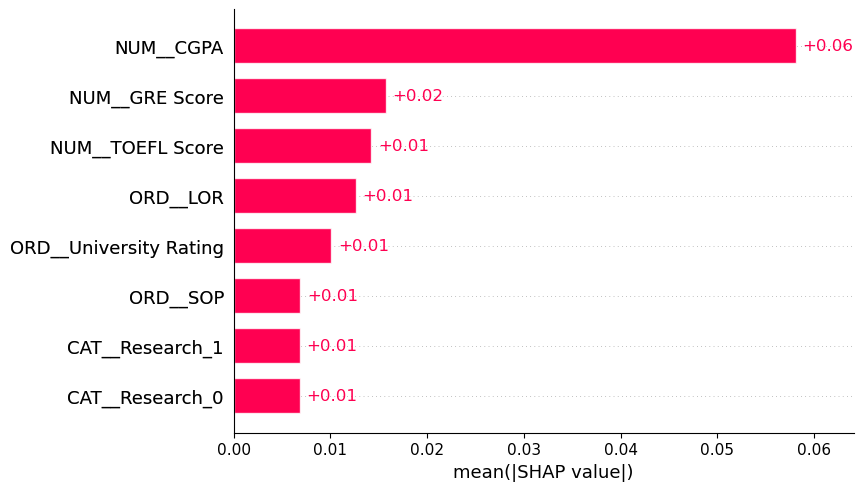

<Figure size 640x480 with 0 Axes>

In [52]:
shap.plots.bar(shap_values)
plt.savefig('feature importance', dpi= 300, bbox_inches = 'tight')

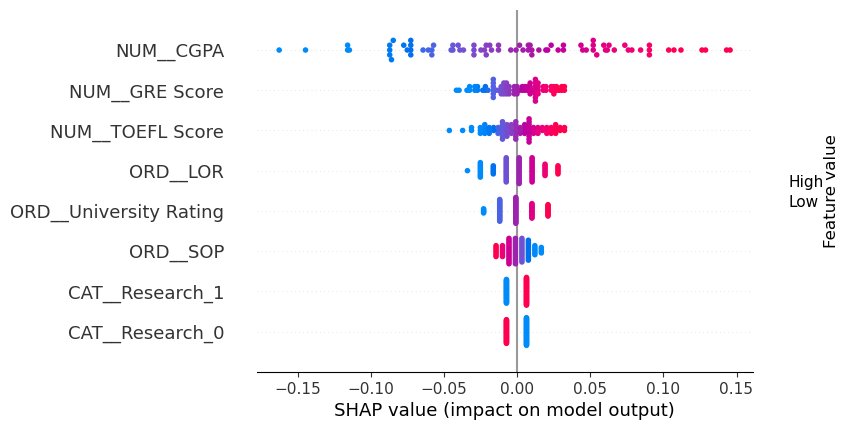

In [53]:
shap.plots.beeswarm(shap_values)

In [54]:
#Try outs
#GRE Score	TOEFL Score	University Rating	SOP	LOR	CGPA	Research

data = [[323, 102, 3, 5, 4, 9, 1],[325, 105, 3, 5, 4, 9.5, 1]]
profile = pd.DataFrame(data, columns = ['GRE Score','TOEFL Score', 'University Rating', 'SOP','LOR', 'CGPA' , 'Research'])
print(profile)

   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0        323          102                  3    5    4   9.0         1
1        325          105                  3    5    4   9.5         1


In [55]:
profile_c = preprocessor.transform(profile)

feature_names = preprocessor.get_feature_names_out()
profile_prep = pd.DataFrame(data=profile_c,columns=feature_names)

print(profile_prep)

Prediced_chance = rid_reg.predict(profile_prep)

   NUM__GRE Score  NUM__TOEFL Score  NUM__CGPA  CAT__Research_0  \
0            0.66          0.307692   0.682540              0.0   
1            0.70          0.423077   0.880952              0.0   

   CAT__Research_1  ORD__University Rating  ORD__SOP  ORD__LOR  
0              1.0                     2.0       8.0       6.0  
1              1.0                     2.0       8.0       6.0  


In [56]:
print(Prediced_chance)

[0.77569774 0.84838322]
